In [6]:
import pandas as pd
import numpy as np

# Cargar el archivo preprocesado
file_path = 'Client_segment_MODIFICADO_updated.csv'  # Cambiar si es necesario
data = pd.read_csv(file_path)

# Verificar datos cargados
print("Información general del dataset:")
print(data.info())

# Verificar valores únicos en variables categóricas
print("\nValores únicos en las columnas categóricas:")
categorical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in categorical_columns:
    unique_values = data[col].nunique()
    print(f"{col}: {unique_values} valores únicos")

# Verificar valores nulos
missing_values = data.isnull().sum()
print("\nValores nulos por columna:")
print(missing_values[missing_values > 0])

# Verificar rango de variables numéricas
print("\nRango de variables numéricas:")
numerical_columns = data.select_dtypes(include=['float64']).columns
for col in numerical_columns:
    min_val, max_val = data[col].min(), data[col].max()
    print(f"{col}: Min = {min_val}, Max = {max_val}")

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10806 entries, 0 to 10805
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         10806 non-null  float64
 1   Genero                     10806 non-null  float64
 2   Casado                     10806 non-null  float64
 3   Edad                       10806 non-null  float64
 4   Graduado                   10806 non-null  float64
 5   Profesion                  10806 non-null  float64
 6   Experiencia laboral        10806 non-null  float64
 7   Gastoscore                 10806 non-null  float64
 8   Family_Size                10806 non-null  float64
 9   Generacion                 10806 non-null  float64
 10  Ingresos anuales brutos    10806 non-null  float64
 11  Provincia                  10806 non-null  float64
 12  Digital_encuesta           10806 non-null  float64
 13  Gasto_medio_m

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Preparar los datos para la selección de características
# Usaremos la columna 'Abandono' como variable objetivo
X = data.drop(columns=['Abandono', 'ID'])  # Excluyendo 'Abandono' y 'ID' para análisis
y = data['Abandono']

# Entrenamiento de un modelo de Random Forest para importancia de características
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Obtener la importancia de las características
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Selección de características con mutual information
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(X, y)
mi_scores = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_selector.scores_
}).sort_values(by='MI_Score', ascending=False)

# Mostrar resultados
print("Importancia de características (Random Forest):")
print(feature_importances)

print("\nImportancia de características (Mutual Information):")
print(mi_scores)


Importancia de características (Random Forest):
                      Feature  Importance
13               Dias_cliente    0.322946
9     Ingresos anuales brutos    0.143447
11           Digital_encuesta    0.124465
10                  Provincia    0.115663
2                        Edad    0.095747
7                 Family_Size    0.049241
4                   Profesion    0.048413
0                      Genero    0.019050
6                  Gastoscore    0.018593
12  Gasto_medio_mensual_cuota    0.017364
3                    Graduado    0.013428
8                  Generacion    0.011697
1                      Casado    0.010113
5         Experiencia laboral    0.009834

Importancia de características (Mutual Information):
                      Feature  MI_Score
13               Dias_cliente  0.151615
8                  Generacion  0.005570
9     Ingresos anuales brutos  0.004429
7                 Family_Size  0.002580
1                      Casado  0.002543
0                      Gener

C:\Users\User\AppData\Local\Temp\ipykernel_41052\3471067409.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


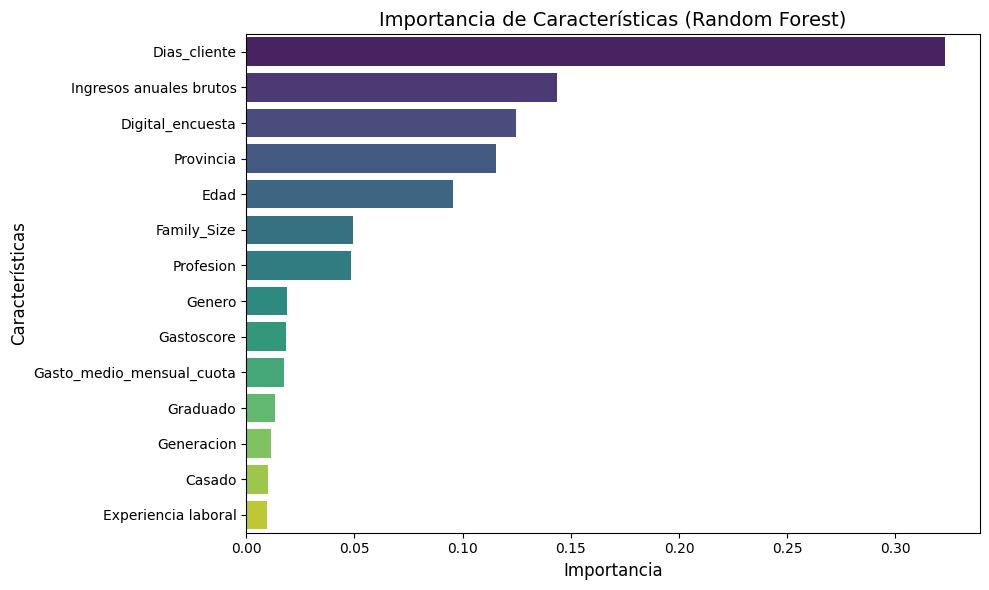

C:\Users\User\AppData\Local\Temp\ipykernel_41052\3471067409.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_scores, x='MI_Score', y='Feature', palette='coolwarm')


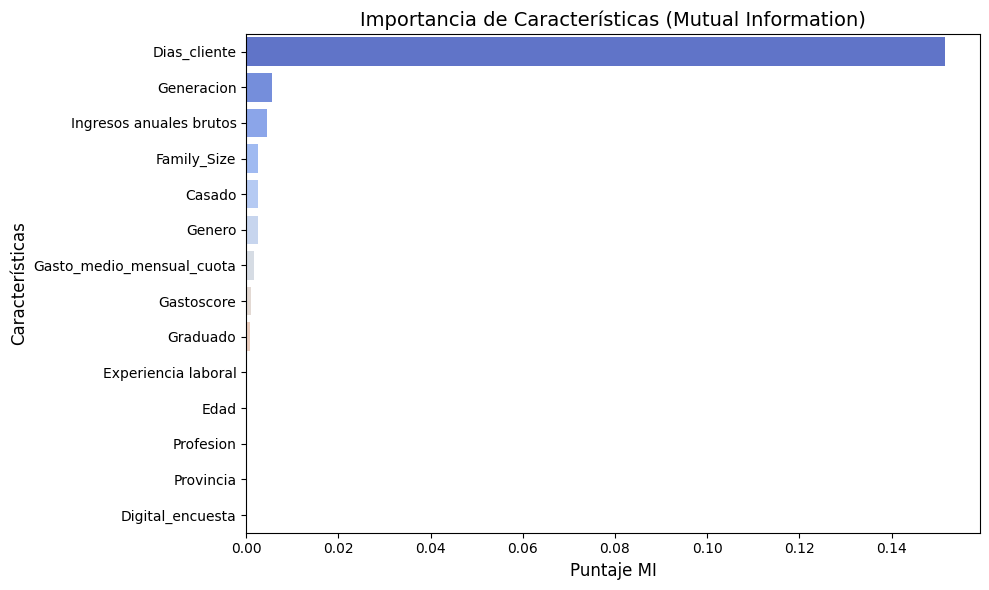

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfica de Importancia (Random Forest)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Importancia de Características (Random Forest)', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfica de Importancia (Mutual Information)
plt.figure(figsize=(10, 6))
sns.barplot(data=mi_scores, x='MI_Score', y='Feature', palette='coolwarm')
plt.title('Importancia de Características (Mutual Information)', fontsize=14)
plt.xlabel('Puntaje MI', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.tight_layout()
plt.show()


Pasos para implementar K-Means:
Preprocesamiento:

Usaremos las variables más relevantes, como Dias_cliente, Ingresos anuales brutos, y Digital_encuesta, basándonos en su importancia.
Escalaremos las variables si aún no lo están.
Determinación del número óptimo de clusters (
𝑘
k):

Utilizaremos el método del codo para encontrar el mejor valor de 
𝑘
k.
Entrenamiento del modelo:

Aplicaremos K-Means con el valor óptimo de 
𝑘
k.
Análisis de los clusters:

Visualizaremos los resultados en dos dimensiones (usando PCA si es necesario).
Analizaremos las características principales de cada cluster.
